In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df_crop = pd.read_csv(r"C:\Users\moham\Downloads\Crop_recommendation.csv")
df_crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
df_crop.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df_crop.shape
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


EDA

C:\Users\moham\AppData\Local\Temp\ipykernel_17092\3788314192.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_crop[x], bins=20)
C:\Users\moham\AppData\Local\Temp\ipykernel_17092\3788314192.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_crop[x], bins=20)
C:\Users\moham\AppData\Local

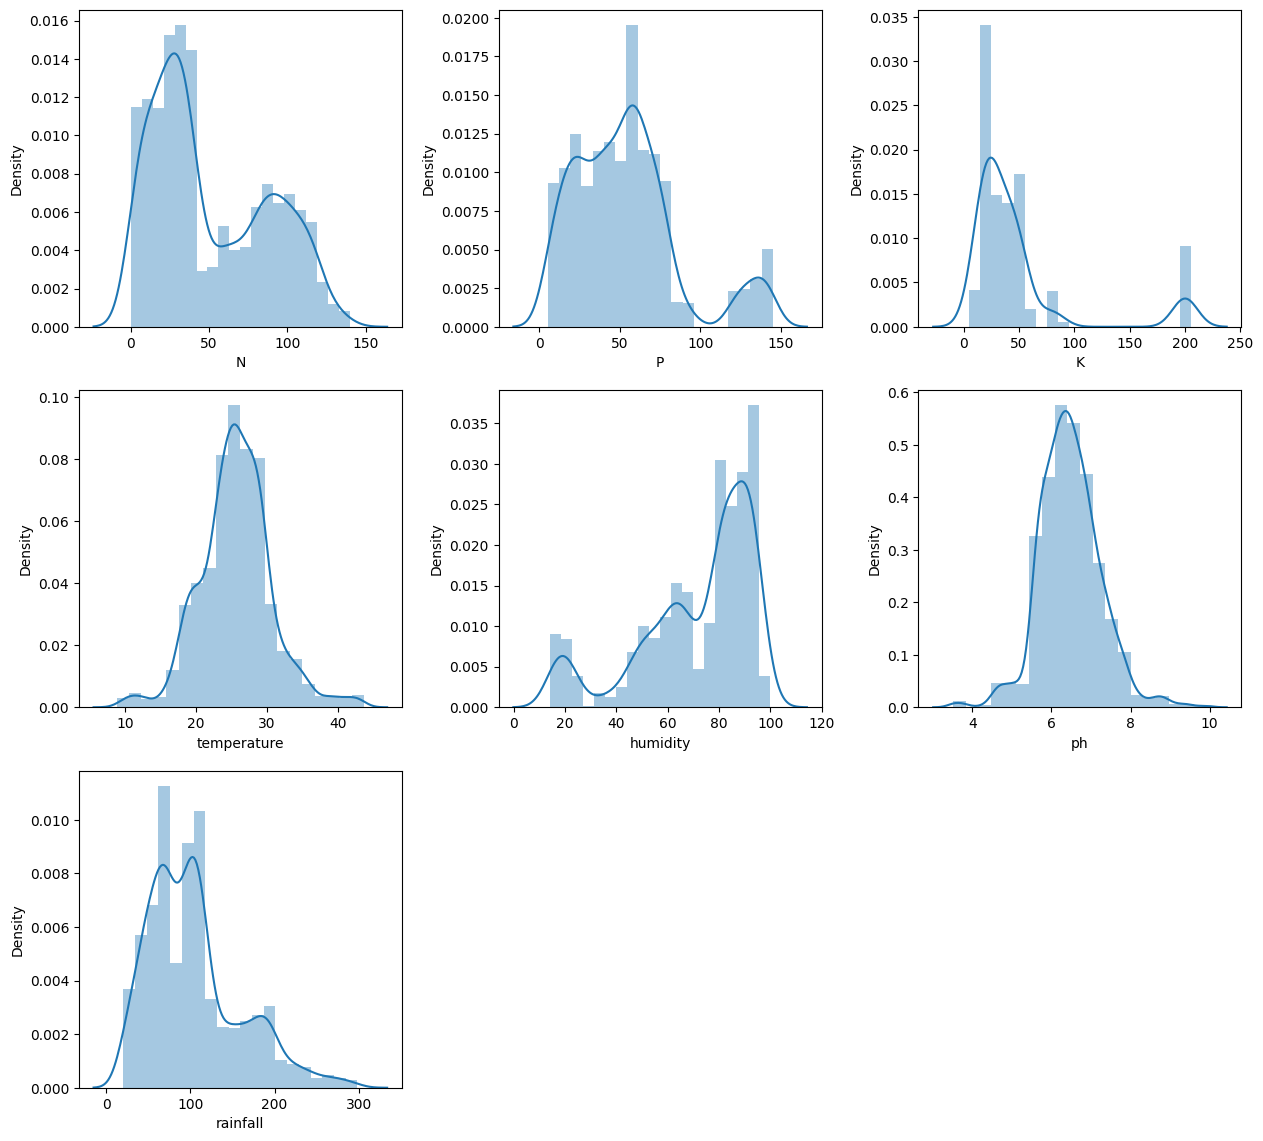

In [ ]:
plt.figure(1, figsize=(15,14))
n = 0 
for x in ['N','P','K','temperature','humidity','ph','rainfall']:
    n += 1
    plt.subplot(3,3,n)
    plt.subplots_adjust(hspace=0.2, wspace=0.3)
    sns.distplot(df_crop[x], bins=20)
plt.show()

In [ ]:
def get_region(row):
    if row['ph'] >= 5.0 and row['ph'] <= 6.5 and row['temperature'] >= 20 and row['temperature'] <= 22.5 and row['rainfall'] >= 150 and row['rainfall'] <= 250:
        return 'Northern India'
    elif row['ph'] >= 5.2 and row['ph'] <= 7.5 and row['temperature'] >= 22.5 and row['temperature'] <= 25 and row['rainfall'] >= 150 and row['rainfall'] <= 250:
        return 'North Eastern India'
    elif row['ph'] >= 5.2 and row['ph'] <= 7.5 and row['temperature'] >= 25 and row['temperature'] <= 27.5 and row['rainfall'] >= 100 and row['rainfall'] <= 150:
        return 'Eastern India' 
    elif row['ph'] >= 6.5 and row['ph'] <= 8.4 and row['temperature'] >= 25 and row['temperature'] <= 27.5 and row['rainfall'] >= 100 and row['rainfall'] <= 150:
        return 'Central India'
    elif row['ph'] >= 6.5 and row['ph'] <= 8.4 and row['temperature'] >= 25 and row['temperature'] <= 27.5 and row['rainfall'] >= 150 and row['rainfall'] <= 250:
        return 'Western India'
    elif row['ph'] >= 5.2 and row['ph'] <= 7.5 and row['temperature'] > 27.5 and row['temperature'] >= 50 and row['rainfall'] <= 100:
        return 'Southern India'
    else:
        return 'Other'
        
    return location
df_crop['region'] = df_crop.apply(get_region, axis=1)

In [ ]:

df_crop = pd.get_dummies(df_crop, columns=['region'], prefix=['region'])
df_crop

,N,P,K,temperature,humidity,ph,rainfall,label,region_Central India,region_Eastern India,region_North Eastern India,region_Northern India,region_Other,region_Western India
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,False,False,False,False,True,False
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,False,False,False,False,True,False
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,False,False,False,False,True,False
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,False,False,False,False,False,True
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,False,False,False,False,False,True
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,False,True,False,False,False,False
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,False,False,True,False,False,False
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,False,True,False,False,False,False


Data Splitting

In [ ]:
X = df_crop.drop(['label'], axis=1)
y = df_crop['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SMOTE

In [ ]:
!pip install --upgrade scikit-learn imbalanced-learn


  Using cached scikit_learn-1.7.0-cp313-cp313-win_amd64.whl.metadata (14 kB)


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [ ]:
from collections import Counter


In [ ]:
X = df_crop.drop(['label'], axis=1)
y = df_crop['label']

from sklearn.model_selection import train_test_split
X_train_raw, X_test, y_train_raw, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Before SMOTE:", Counter(y_train_raw))

# Now apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train_raw, y_train_raw)

print("After SMOTE:", Counter(y_train))


Before SMOTE: Counter({'lentil': 89, 'orange': 86, 'grapes': 86, 'cotton': 83, 'coffee': 83, 'muskmelon': 83, 'mango': 81, 'mungbean': 81, 'rice': 81, 'watermelon': 81, 'blackgram': 80, 'kidneybeans': 80, 'banana': 79, 'maize': 79, 'apple': 77, 'pomegranate': 77, 'pigeonpeas': 77, 'jute': 77, 'papaya': 77, 'mothbeans': 76, 'chickpea': 74, 'coconut': 73})
After SMOTE: Counter({'orange': 89, 'blackgram': 89, 'lentil': 89, 'banana': 89, 'mango': 89, 'maize': 89, 'apple': 89, 'pomegranate': 89, 'cotton': 89, 'mungbean': 89, 'pigeonpeas': 89, 'chickpea': 89, 'coffee': 89, 'jute': 89, 'papaya': 89, 'grapes': 89, 'rice': 89, 'kidneybeans': 89, 'muskmelon': 89, 'mothbeans': 89, 'watermelon': 89, 'coconut': 89})


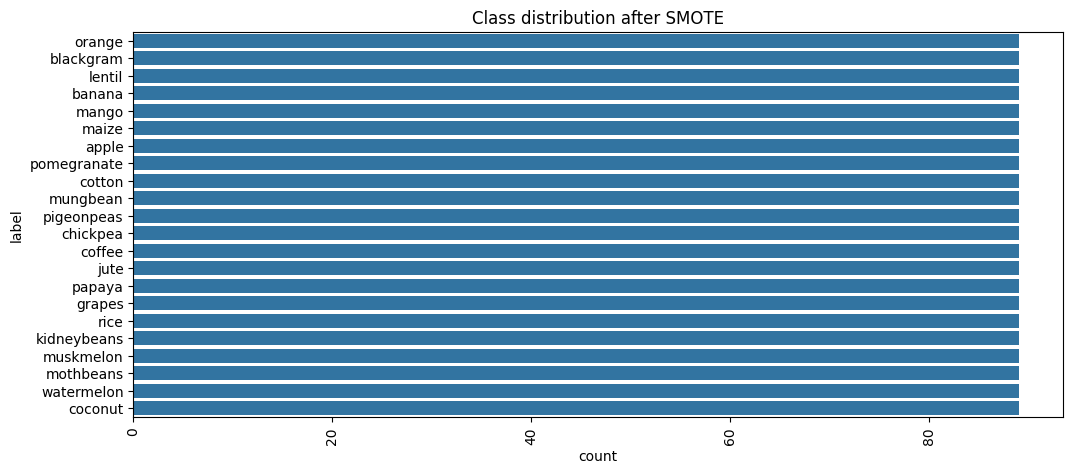

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.countplot(y_train)
plt.xticks(rotation=90)
plt.title("Class distribution after SMOTE")
plt.show()


In [ ]:

# Variables for Accuracy and Models
acc = []
model = []


Random Forests

from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=42, max_depth=None)
RandomForest.fit(X_train, y_train)

y_pred = RandomForest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy * 100)
acc.append(accuracy)
model.append('Random Forest')

report = classification_report(y_test, y_pred)
print('Classification report:\n', report)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the grid of parameters to try
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy']
}

# Use GridSearchCV to find the best parameters
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Get the best model and evaluate
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

y_pred = best_model.predict(X_test)

# Accuracy & classification report
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print("Tuned Random Forest Accuracy:", accuracy * 100)

print("Classification Report:\n", classification_report(y_test, y_pred))

# Optional: store accuracy for model comparison
acc.append(accuracy)
model.append("Tuned Random Forest")


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}
Tuned Random Forest Accuracy: 99.54545454545455
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X, y, cv=5)
print("Cross-validation accuracy:", cv_scores.mean())


Cross-validation accuracy: 0.9922727272727274


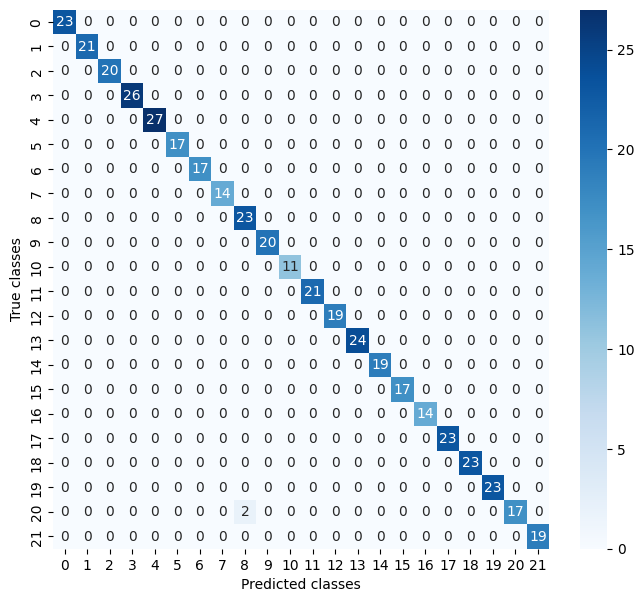

In [ ]:
# Confusion Metrics
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true and predicted classes, respectively
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using a heatmap
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
plt.show()

In [ ]:

# Experiment 1
RandomForest = RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42, max_depth=5)
RandomForest.fit(X_train, y_train)

y_pred = RandomForest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy * 100)

Accuracy: 97.95454545454545


XGBoost Model

In [ ]:
!pip install xgboost


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Create LabelEncoder
le = LabelEncoder()

# Step 2: Fit and transform on y
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Step 3: Fit XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train_encoded)

# Step 4: Predict and evaluate
y_pred_xgb = xgb.predict(X_test)

# Step 5: Decode predictions back to original crop names (optional)
y_pred_labels = le.inverse_transform(y_pred_xgb)

from sklearn.metrics import accuracy_score, classification_report
print("XGBoost Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test_encoded, y_pred_xgb))

acc.append(accuracy_score(y_test_encoded, y_pred_xgb))
model.append('XGBoost')


XGBoost Accuracy: 0.9840909090909091
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       0.96      1.00      0.98        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       0.95      1.00      0.97        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1

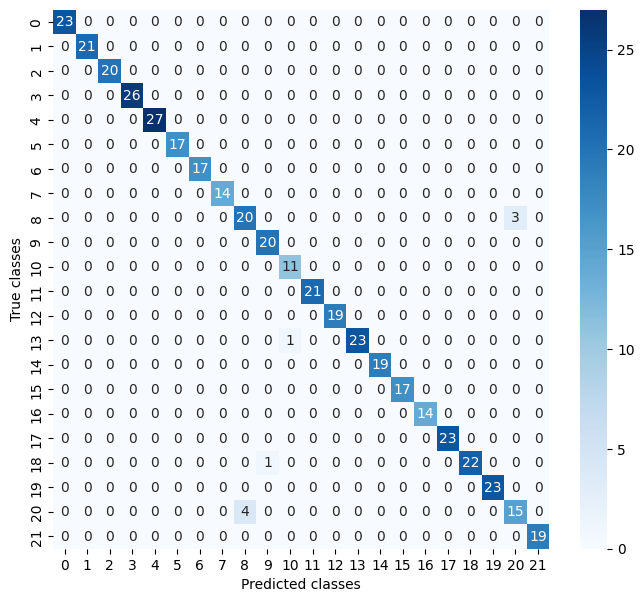

In [ ]:
# Assuming y_test and y_pred are your true and predicted classes, respectively
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using a heatmap
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Encode the string labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# 1. Create XGBoost classifier (you can set parameters like decision tree)
xgb = XGBClassifier(
    max_depth=5,              # Same depth as Decision Tree
    learning_rate=0.1,        # Optional: learning speed
    n_estimators=100,         # Trees to use
    objective='multi:softmax',# For multiclass classification
    num_class=len(le.classes_), # Total number of crop classes
    random_state=42
)

# 2. Train the model
xgb.fit(X_train, y_train_encoded)

# 3. Predict on test data
y_pred_xgb = xgb.predict(X_test)

# 4. Evaluate accuracy
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print('XGBoost Accuracy:', accuracy_xgb * 100)

# 5. Optional: Show crop prediction names
print("Predicted crop:", le.inverse_transform([y_pred_xgb[0]]))


XGBoost Accuracy: 98.63636363636363
Predicted crop: ['muskmelon']


In [ ]:
from sklearn.metrics import classification_report

print("Random Forest Report:")
print(classification_report(y_test, RandomForest.predict(X_test)))

print("XGBoost Report:")
print(classification_report(y_test_encoded, y_pred_xgb))


Random Forest Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.83      0.87      0.85        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
     


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisonTree = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=None)
DecisonTree.fit(X_train, y_train)

y_pred = DecisonTree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy * 100)
acc.append(accuracy)
model.append('Decision Tree')

report = classification_report(y_test, y_pred)
print('Classification report:\n', report)

Accuracy: 99.0909090909091
Classification report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1

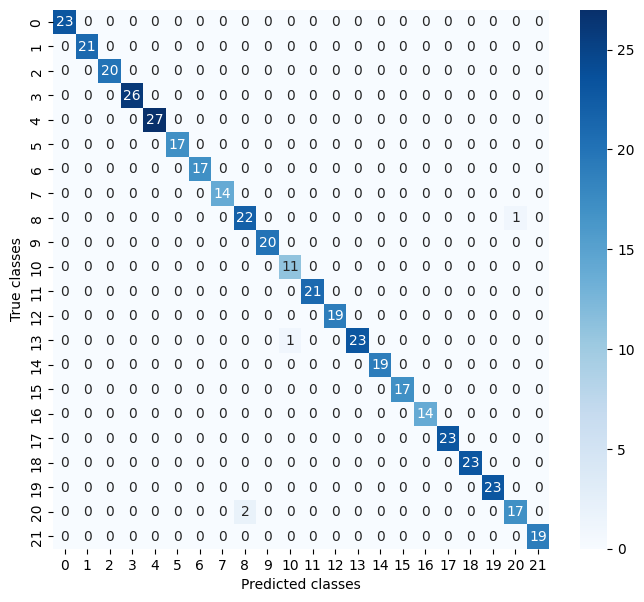

In [ ]:
# Assuming y_test and y_pred are your true and predicted classes, respectively
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using a heatmap
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
plt.show()

In [ ]:
# Experiment 1
DecisonTree = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=5)
DecisonTree.fit(X_train, y_train)

y_pred = DecisonTree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy * 100)

Accuracy: 54.090909090909086


Neural Network MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Classifier = MLPClassifier(hidden_layer_sizes=(30, 20), activation="relu", 
                           max_iter=300, solver='adam', learning_rate='constant')
Classifier.fit(X_train_scaled, y_train)

y_pred = Classifier.predict(X_test_scaled)
nn_testing_acc = metrics.accuracy_score(y_test, y_pred)
# acc.append(testing_acc)
# model.append('MLPClassifier')
print("MLPClassifier Accuracy: ", nn_testing_acc*100)

acc.append(nn_testing_acc)
model.append('MLP Classifier')

report = classification_report(y_test, y_pred)
print('Classification report:\n', report)

MLPClassifier Accuracy:  96.5909090909091
Classification report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.82      0.78      0.80        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.79      1.00      0.88        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange   

C:\Users\moham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


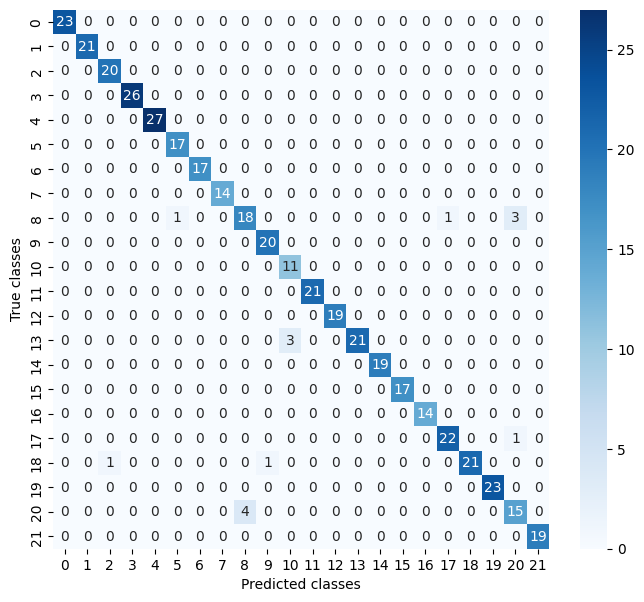

In [ ]:
# Assuming y_test and y_pred are your true and predicted classes, respectively
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using a heatmap
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
plt.show()

In [ ]:
# Experiment 1
Classifier = MLPClassifier(hidden_layer_sizes=(40, 30), activation="relu", 
                           max_iter=300, solver='sgd', learning_rate='adaptive')
Classifier.fit(X_train_scaled, y_train)

y_pred = Classifier.predict(X_test_scaled)
nn_testing_acc = metrics.accuracy_score(y_test, y_pred)
# acc.append(testing_acc)
# model.append('MLPClassifier')
print("MLPClassifier Accuracy: ", nn_testing_acc*100)

MLPClassifier Accuracy:  76.36363636363637


C:\Users\moham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22, weights='distance', algorithm='auto')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
knn_testing_acc = metrics.accuracy_score(y_test, y_pred)
# acc.append(testing_acc)
# model.append('K Nearest Neighbours')
print("KNN Accuracy: ", knn_testing_acc*100)

acc.append(knn_testing_acc)
model.append('KNN')

report = classification_report(y_test, y_pred)
print('Classification report:\n', report)

KNN Accuracy:  96.36363636363636
Classification report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.91      1.00      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        17
      cotton       0.85      1.00      0.92        17
      grapes       1.00      1.00      1.00        14
        jute       0.77      1.00      0.87        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      0.86      0.92        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00 

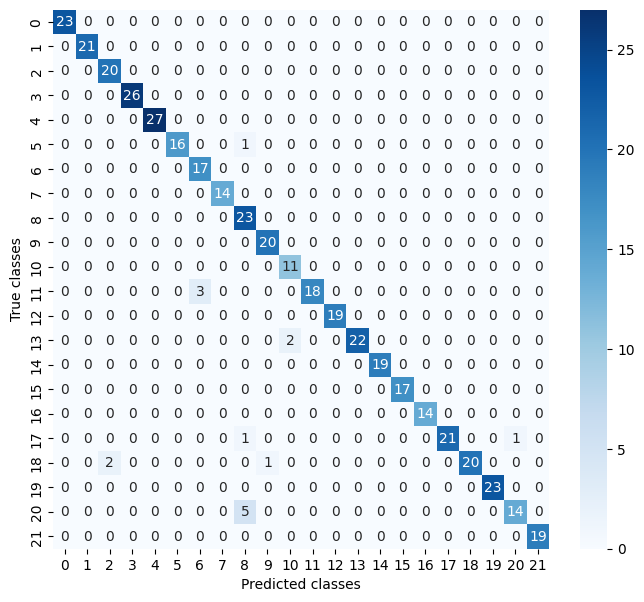

In [ ]:

# Assuming y_test and y_pred are your true and predicted classes, respectively
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using a heatmap
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=22, weights='uniform', algorithm='kd_tree')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
knn_testing_acc = metrics.accuracy_score(y_test, y_pred)
print("KNN Accuracy: ", knn_testing_acc*100)

KNN Accuracy:  95.22727272727273


Test Algorithm

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

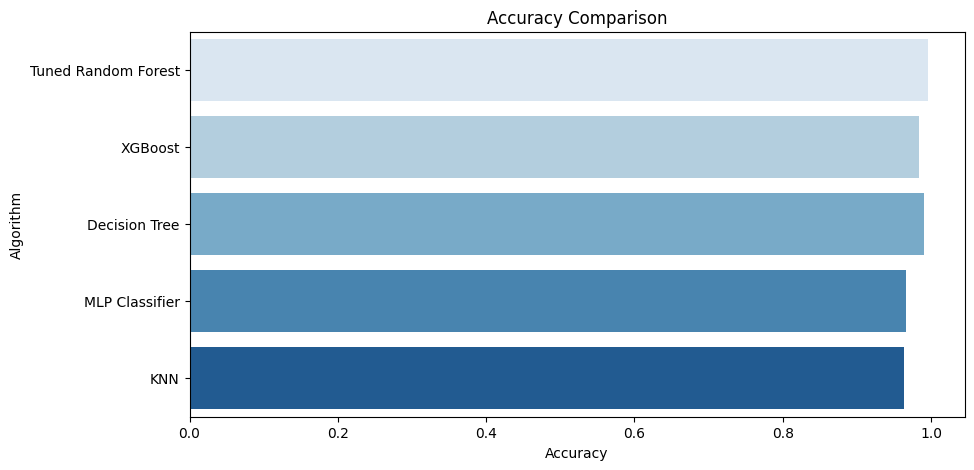

In [ ]:

plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model, palette='Blues')

In [ ]:
import numpy as np
test_rc = np.array([[107,34,32,26.774637,66.413269,6.780064,177.774507,0,0,0,0,0,1]])
print(test_rc)

[[107.        34.        32.        26.774637  66.413269   6.780064
  177.774507   0.         0.         0.         0.         0.
    1.      ]]


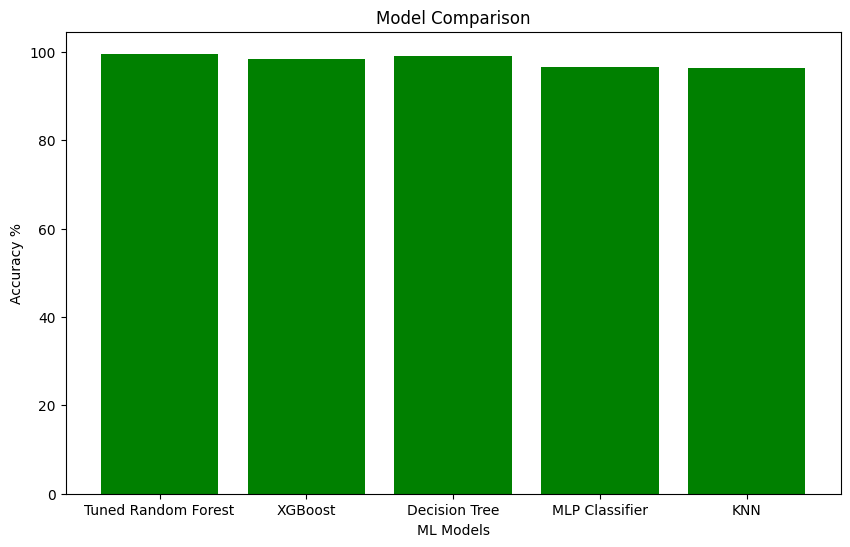

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(model, [a * 100 for a in acc], color='green')  # acc = list of accuracies, model = model names
plt.xlabel("ML Models")
plt.ylabel("Accuracy %")
plt.title("Model Comparison")
plt.show()


Test Algorithm

In [ ]:
y_pred_1 = RandomForest.predict(test_rc)
print(y_pred_1)

['coffee']


C:\Users\moham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
test_rc2 = np.array([[70,25,25,38.2,30.4,5.6,50.0,0,1,0,0,0,0]])
y_pred_2 = RandomForest.predict(test_rc2)
print(y_pred_2)


['coffee']


C:\Users\moham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
